In [32]:
import numpy as np #numeric operations, like working on matrix, or vectors,....
import pandas as pd #Loading and working on dataset
import matplotlib.pyplot as plt #ploting and visualizing our data
import warnings #ignoring the red alert massages
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/Monster/Desktop/salaryprediction/Salary.csv")

In [33]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [34]:
df = df.dropna()

In [35]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [37]:
df.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


In [38]:
df['Education Level'].value_counts()

Education Level
1    3021
2    1858
3    1369
0     436
Name: count, dtype: int64

In [39]:
education_mapping = {
    0: 'High School',
    1: 'Bachelor',
    2: 'Master',
    3: 'PhD'
}

# Mapping the Education Level Field
df['Education Level'] = df['Education Level'].map(education_mapping)

print(df['Education Level'].value_counts())

Education Level
Bachelor       3021
Master         1858
PhD            1369
High School     436
Name: count, dtype: int64


In [40]:
df['Country'].value_counts()

Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64

In [41]:
df['Race'].value_counts()

Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64

In [42]:
df['Job Title'].value_counts()

Job Title
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64

In [43]:
# Assign the result of value_counts() to a variable
value_counts = df['Job Title'].value_counts()

# Choose the ones which are higher than 300 and rename them as "Other"
over_300 = value_counts[value_counts > 100].index

df.loc[~df['Job Title'].isin(over_300), 'Job Title'] = 'Other'

print(df['Job Title'].value_counts())

Job Title
Other                        1379
Software Engineer             809
Data Scientist                515
Data Analyst                  391
Software Engineer Manager     376
Product Manager               323
Project Engineer              317
Marketing Manager             315
Full Stack Engineer           304
Back end Developer            242
Front end Developer           239
Sales Associate               212
Software Developer            186
Marketing Coordinator         167
Human Resources Manager       152
Marketing Analyst             144
Financial Manager             139
Web Developer                 129
Operations Manager            122
Research Scientist            119
HR Generalist                 104
Name: count, dtype: int64


EDA

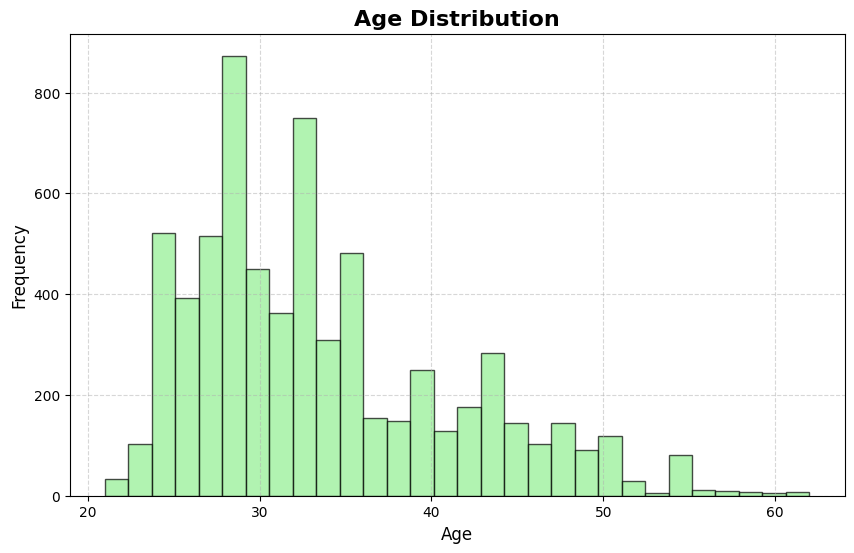

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='#90EE90', edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

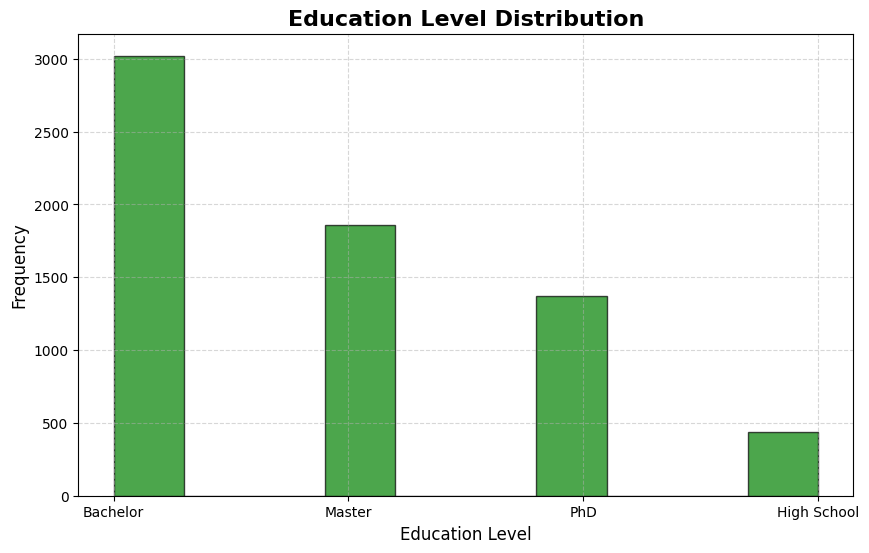

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['Education Level'], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title('Education Level Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

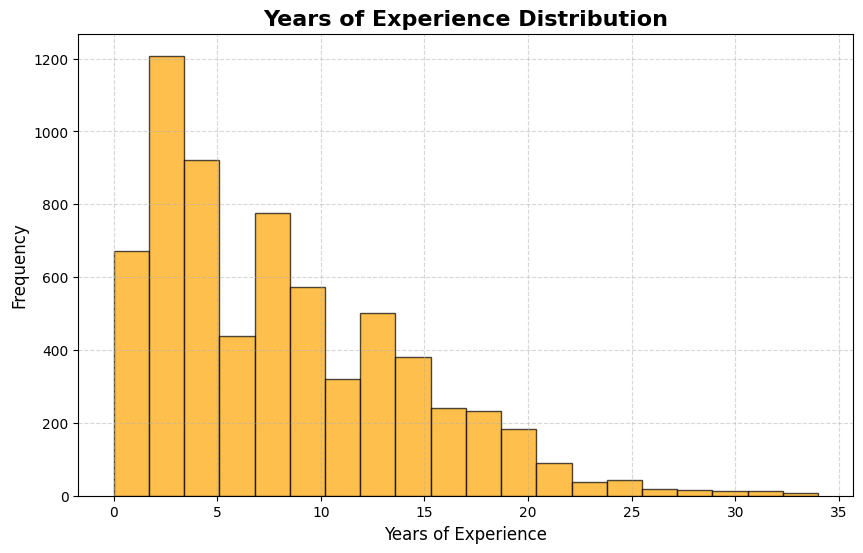

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['Years of Experience'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Years of Experience Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

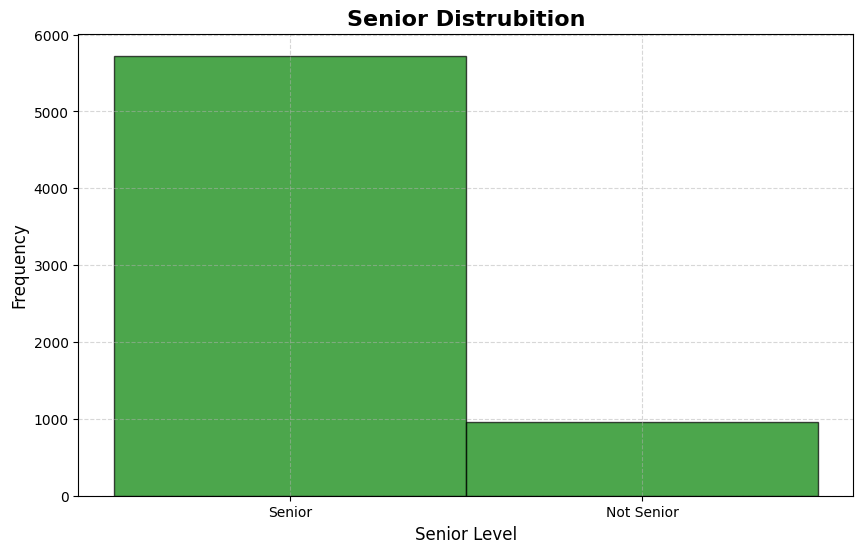

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['Senior'], bins=2, color='green', edgecolor='black', alpha=0.7)
plt.title('Senior Distrubition', fontsize=16, fontweight='bold')
plt.xlabel('Senior Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks([0.25, 0.75], ["Senior", "Not Senior"])
plt.show()

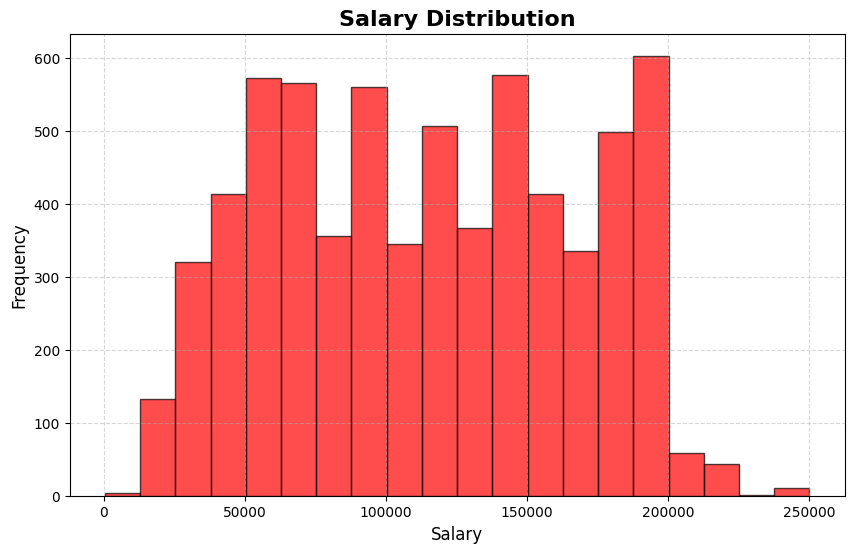

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df['Salary'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('Salary Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

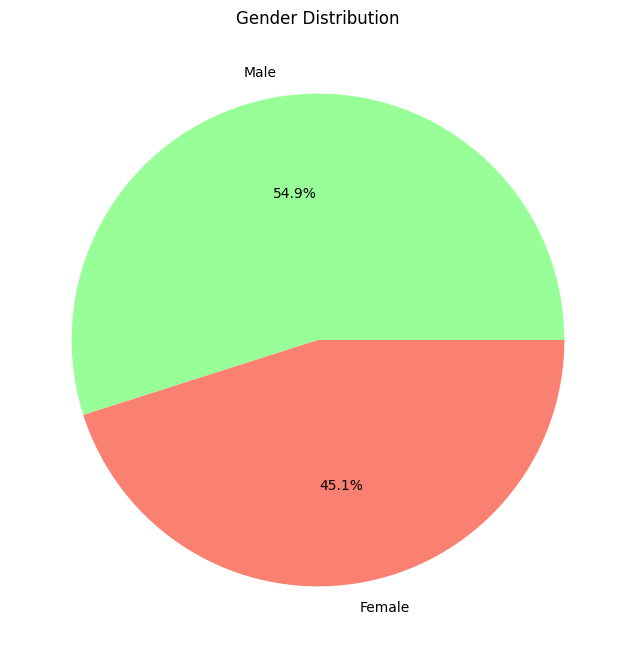

In [50]:
gender_distribution = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['#98FF98', 'salmon'])
plt.title('Gender Distribution')
plt.show()

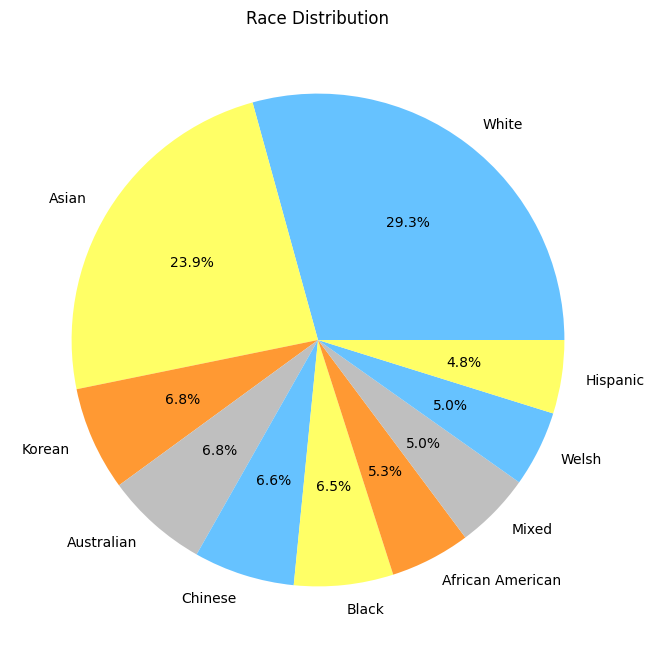

In [51]:
custom_colors = ['#66c2ff', '#ffff66', '#ff9933', '#bfbfbf']

plt.figure(figsize=(8, 8))
plt.pie(df['Race'].value_counts(), labels=df['Race'].value_counts().index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Race Distribution')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


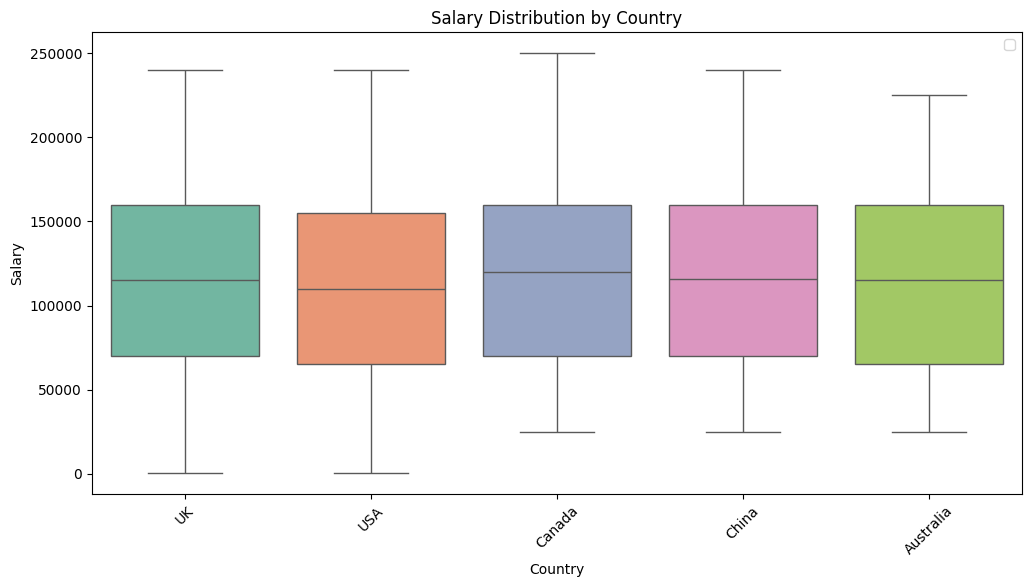

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Salary', hue='Country', palette='Set2', dodge=False)
plt.title('Salary Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # x ekseni etiketlerini 45 derece döndürme
plt.legend(title=None)  # Legendları kaldır
plt.show()

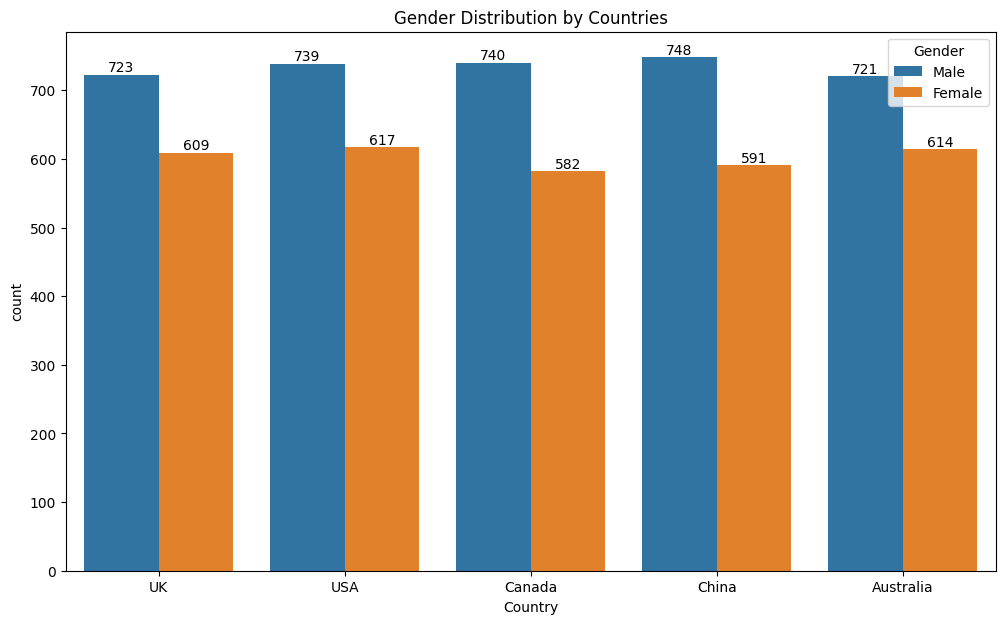

In [53]:
plt.figure(figsize=(12, 7))
aa = sns.countplot(x='Country', data=df, hue='Gender')

for bars in aa.containers:
    aa.bar_label(bars)

plt.title('Gender Distribution by Countries')
plt.show()
plt.show()

               Age  Years of Experience         Salary       Senior
count  6684.000000          6684.000000    6684.000000  6684.000000
mean     33.610563             8.077723  115307.175194     0.143477
std       7.595994             6.029305   52806.810881     0.350585
min      21.000000             0.000000     350.000000     0.000000
25%      28.000000             3.000000   70000.000000     0.000000
50%      32.000000             7.000000  115000.000000     0.000000
75%      38.000000            12.000000  160000.000000     0.000000
max      62.000000            34.000000  250000.000000     1.000000


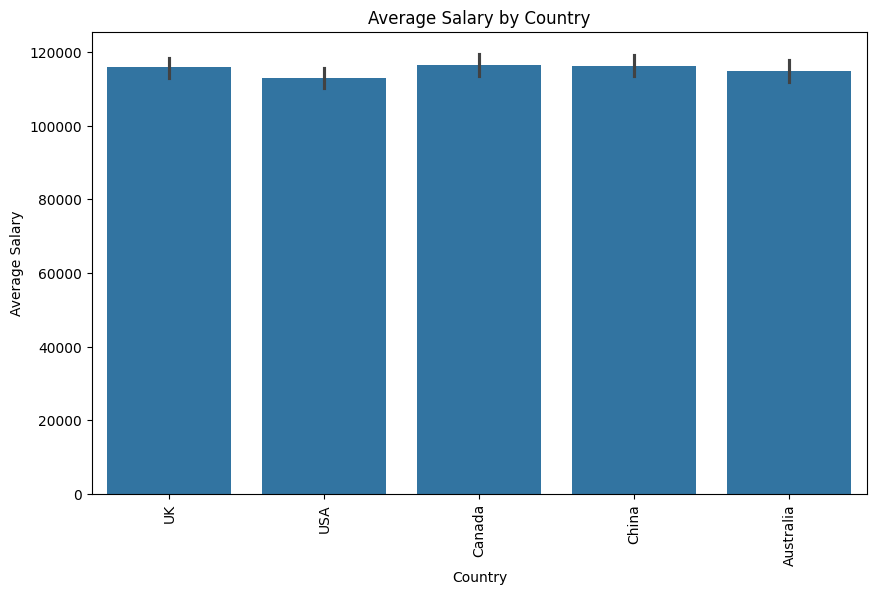

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
summary_statistics = df.describe()
print(summary_statistics)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Average Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.show()

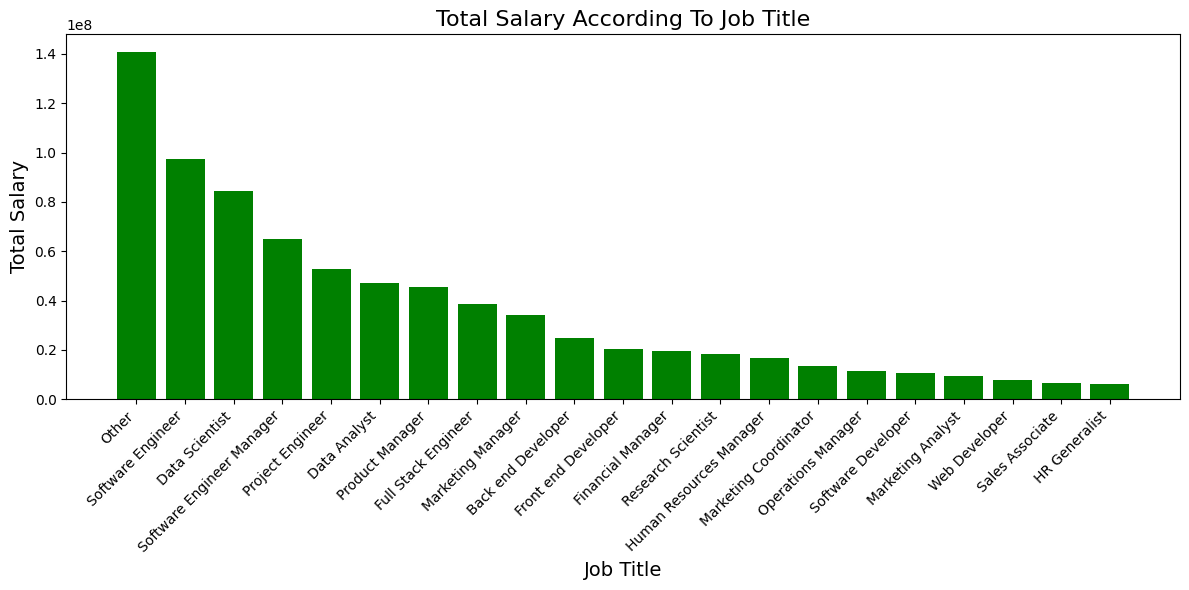

In [55]:
salary_by_jobtitle = df.groupby('Job Title')['Salary'].sum()
jobtitle_counts = df['Job Title'].value_counts()
jobtitles_with_multiple_occurrences = jobtitle_counts[jobtitle_counts > 20].index
salary_by_jobtitle = salary_by_jobtitle.loc[jobtitles_with_multiple_occurrences]
salary_by_jobtitle = salary_by_jobtitle.sort_values(ascending=False)
labels = salary_by_jobtitle.index
values = salary_by_jobtitle.values
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='green')
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Total Salary', fontsize=14)
plt.title('Total Salary According To Job Title', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

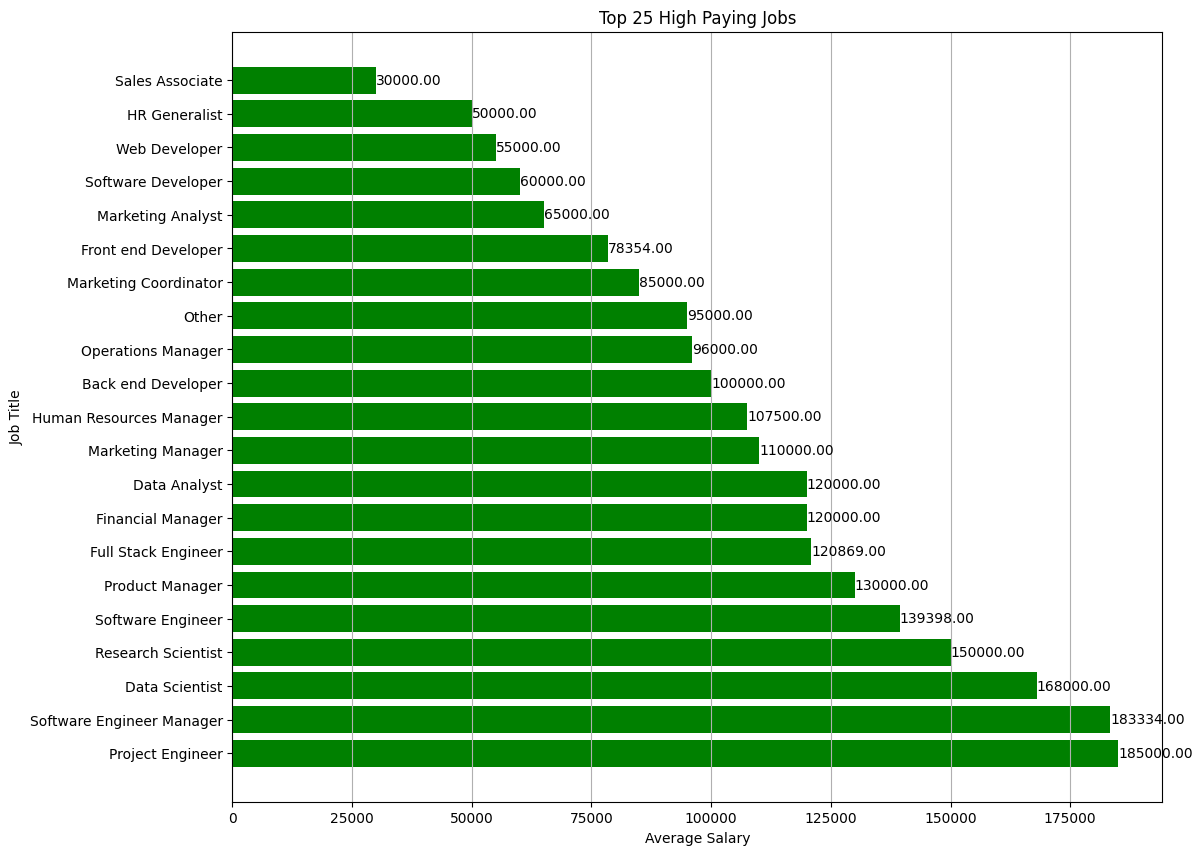

In [56]:
job_titles = df.groupby("Job Title")
highest_paying_jobs = job_titles[["Salary"]].median().sort_values("Salary", ascending=False).head(25)
plt.figure(figsize=(12, 10))
bars = plt.barh(highest_paying_jobs.index, highest_paying_jobs["Salary"], color='green')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top 25 High Paying Jobs')
plt.grid(axis='x') 
for bar, salary in zip(bars, highest_paying_jobs["Salary"]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{salary:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

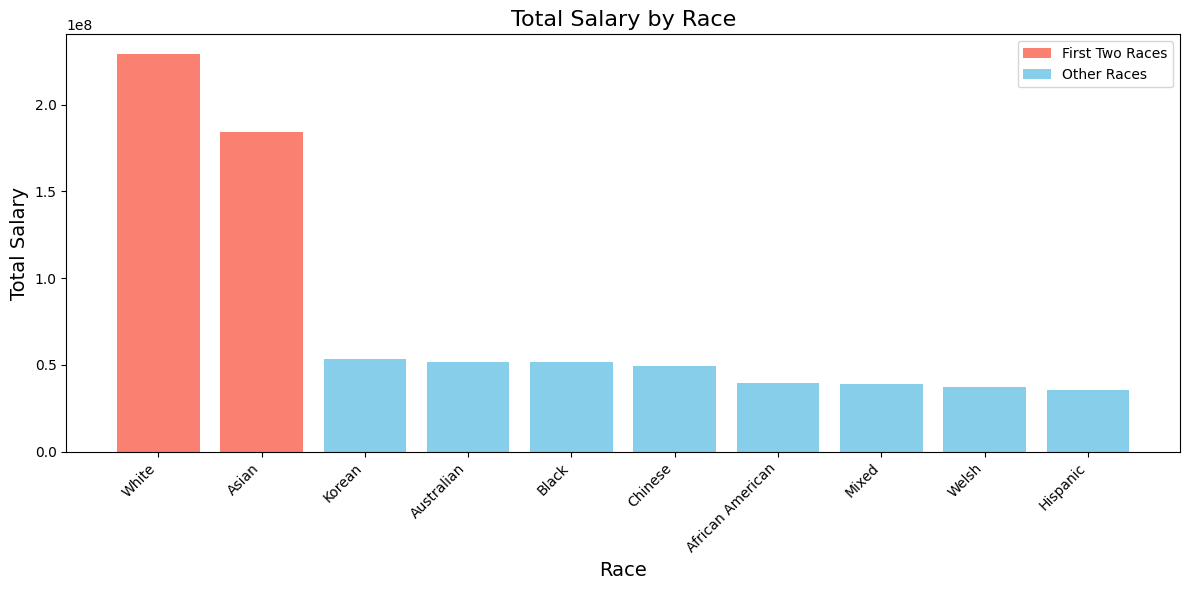

In [57]:
salary_by_race = df.groupby('Race')['Salary'].sum().sort_values(ascending=False)
labels = salary_by_race.index
values = salary_by_race.values
top_races = salary_by_race.head(2).index
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color=['salmon' if race in top_races else 'skyblue' for race in labels])
plt.xlabel('Race', fontsize=14)
plt.ylabel('Total Salary', fontsize=14)
plt.title('Total Salary by Race', fontsize=16)
plt.xticks(rotation=45, ha='right') 
custom_labels = [plt.Rectangle((0,0),1,1,fc='salmon', edgecolor = 'none'), plt.Rectangle((0,0),1,1,fc='skyblue', edgecolor = 'none')]
plt.legend(custom_labels, ['First Two Races', 'Other Races'], loc='upper right')
plt.tight_layout()
plt.show()

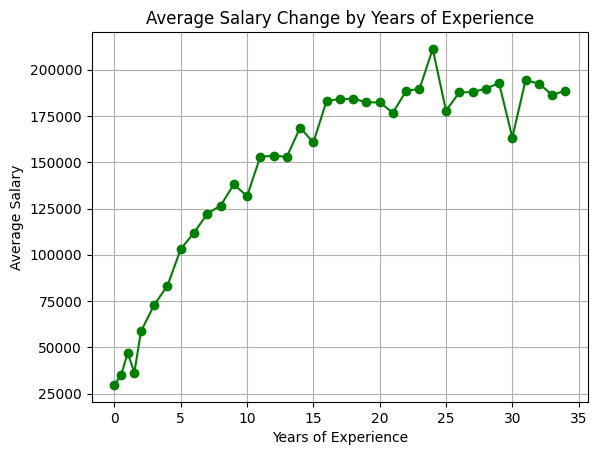

In [59]:
means_of_salaries = df.groupby('Years of Experience')['Salary'].mean().reset_index()
plt.plot(means_of_salaries['Years of Experience'], means_of_salaries['Salary'], marker='o', linestyle='-', color='g')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
plt.title('Average Salary Change by Years of Experience')
plt.grid(True)
plt.show()

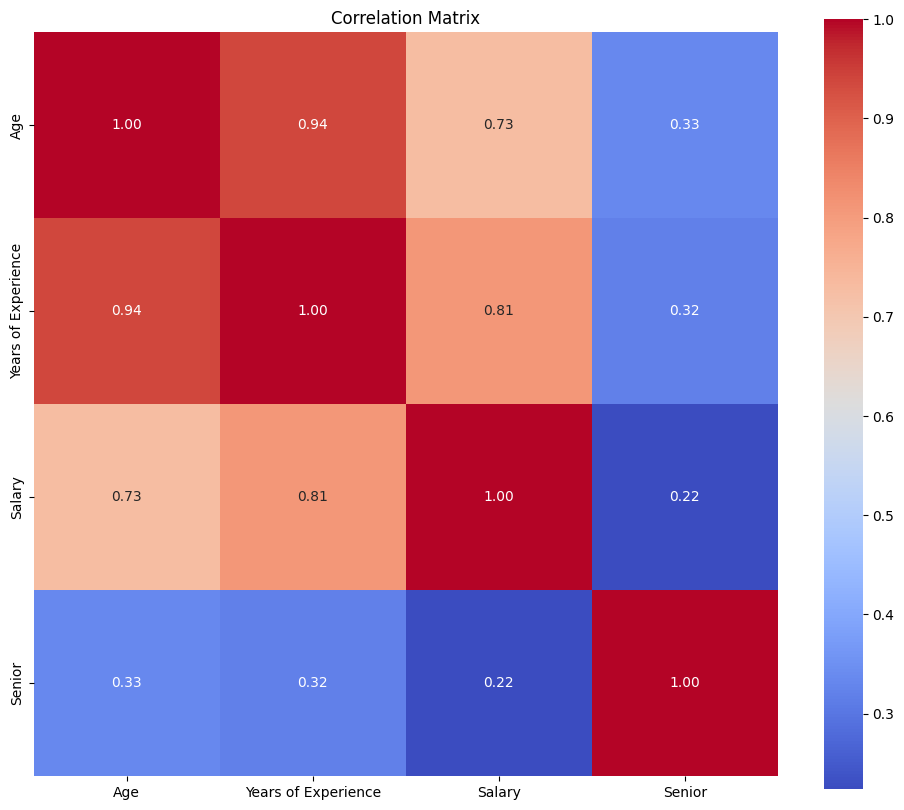

In [60]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

According to the results of this Correlation matrix, we decide to eliminate the Age column since the Years of Experience and Age value are equally affected by the result.

According to the result of this Correlation matrix, we conclude that the Senior value does not have a significant effect on the result.

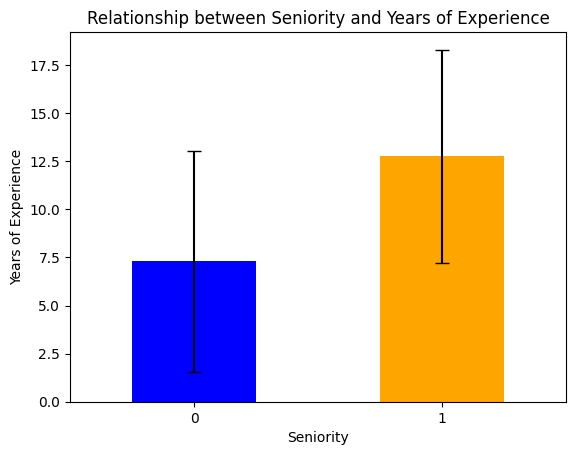

In [61]:
grouped = df.groupby('Senior')['Years of Experience']
means = grouped.mean()
errors = grouped.std()
means.plot(kind='bar', yerr=errors, capsize=5, color=['blue', 'orange'])
plt.xlabel('Seniority')
plt.ylabel('Years of Experience')
plt.title('Relationship between Seniority and Years of Experience')
plt.xticks(rotation=0)
plt.show()

According to this Graph result, we decide to eliminate the Senior column since the Years of Experience and Senior value results are equally affected.

FEATURE SELECTION

In [62]:
df = df.drop(columns=['Age','Senior'])

LABEL ENCODING FOR CATEGORICAL COLUMNS

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoding_country=LabelEncoder()
df["Country"]=label_encoding_country.fit_transform(df["Country"])
df["Country"].unique()

array([3, 4, 1, 2, 0])

In [64]:
label_encoding_education_level=LabelEncoder()
df["Education Level"]=label_encoding_education_level.fit_transform(df["Education Level"])
df["Education Level"].unique()

array([0, 2, 3, 1])

In [65]:
label_encoding_race=LabelEncoder()
df["Race"]=label_encoding_race.fit_transform(df["Race"])
df["Race"].unique()

array([9, 5, 1, 6, 4, 2, 8, 0, 7, 3])

In [66]:
label_encoding_gender=LabelEncoder()
df["Gender"]=label_encoding_gender.fit_transform(df["Gender"])
df["Gender"].unique()

array([1, 0])

In [67]:
label_encoding_job_title=LabelEncoder()
df["Job Title"]=label_encoding_job_title.fit_transform(df["Job Title"])
df["Job Title"].unique()

array([18,  1, 12, 16,  8, 13,  9, 17, 11, 10,  3,  2,  6, 14, 20, 15,  7,
       19,  0,  5,  4])

In [68]:
df.head()

,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,1,0,18,5.0,90000.0,3,9
1,0,2,1,3.0,65000.0,4,5
2,1,3,12,15.0,150000.0,1,9
3,0,0,16,7.0,60000.0,4,5
4,1,2,12,20.0,200000.0,4,1


MODELLING

SINGLE LINEAR REGRESSION

In [69]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


X = df["Years of Experience"].values.reshape(-1, 1)
y = df["Salary"].values

# Splitting the dataset into training and tests datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model and training it
model_linear_regression = LinearRegression()

start_time = time.time()
model_linear_regression.fit(X_train, y_train)
training_time = time.time() - start_time

# Making a predcition on test dataset.
y_pred = model_linear_regression.predict(X_test)

# Evaluating the model's performance.
mean_squared_error_linear_regression=mean_squared_error(y_test, y_pred)
r2_score_linear_regression=r2_score(y_test, y_pred)
linear_regression_time=training_time
print('Mean Squared Error:', mean_squared_error_linear_regression)
print('R^2 Score:', r2_score_linear_regression)
print('Time:', linear_regression_time)

Mean Squared Error: 953178393.9509802
R^2 Score: 0.656995759803086
Time: 0.007457733154296875


Single Linear Regression - Cross Validation

In [70]:
# K-Fold Cross Validation
from sklearn.model_selection import RepeatedKFold, cross_val_score


cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=125)

# Creating Linear Regression Model
model_single_linear_regression_cross_validation = LinearRegression()

# Evaluating the model
mse_scores = -cross_val_score(model_single_linear_regression_cross_validation, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model_single_linear_regression_cross_validation, X, y, cv=cv, scoring='r2')

# Evaluating the error metrics
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()

print("Mean Squared Error:", mean_mse)
print("R^2 Score:", mean_r2)

Mean Squared Error: 955695936.7277119
R^2 Score: 0.6569246665234619


MULTIPLE LINEAR REGRESSION

In [71]:
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multiple_linear_regresyon = LinearRegression()
start_time = time.time()
model_multiple_linear_regresyon.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = model_multiple_linear_regresyon.predict(X_test)

mean_squared_error_multiple_linear_regression=mean_squared_error(y_test, y_pred)
r2_score_multiple_linear_regression=r2_score(y_test, y_pred)
multiple_linear_regression_time=training_time
print('Mean Squared Error:', mean_squared_error_multiple_linear_regression)
print('R^2 Score:', r2_score_multiple_linear_regression)
print('Time:', multiple_linear_regression_time)

Mean Squared Error: 879626793.1775767
R^2 Score: 0.6834635344595953
Time: 0.005988121032714844


Multiple Linear Regression- Cross Validation

In [72]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=125)

model_multiple_linear_regression_cross_validation = LinearRegression()

mse_scores = -cross_val_score(model_multiple_linear_regression_cross_validation, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model_multiple_linear_regression_cross_validation, X, y, cv=cv, scoring='r2')

mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()

print("Mean Squared Error:", mean_mse)
print("R^2 Score:", mean_r2)

Mean Squared Error: 894758539.8281674
R^2 Score: 0.6788072809220121


DECISION TREE REGRESSION

In [73]:
from sklearn.tree import DecisionTreeRegressor

model_decision_tree_regressor = DecisionTreeRegressor()
start_time = time.time()

model_decision_tree_regressor.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = model_decision_tree_regressor.predict(X_test)

mean_squared_error_decision_tree_regressor=mean_squared_error(y_test, y_pred)
r2_score_decision_tree_regressor=r2_score(y_test, y_pred)
decision_tree_regressor_time=training_time
print('Mean Squared Error:', mean_squared_error_decision_tree_regressor)
print('R^2 Score:', r2_score_decision_tree_regressor)
print('Time:', decision_tree_regressor_time)

Mean Squared Error: 279884296.32375413
R^2 Score: 0.8992827564988697
Time: 0.011969327926635742


RANDOM FOREST REGRESSOR

In [74]:
from sklearn.ensemble import RandomForestRegressor


model_random_forest_regressor = RandomForestRegressor()

start_time = time.time()

model_random_forest_regressor.fit(X_train, y_train)

training_time = time.time() - start_time

y_pred = model_random_forest_regressor.predict(X_test)

mean_squared_error_random_forest_regressor=mean_squared_error(y_test, y_pred)
r2_score_random_forest_regressor=r2_score(y_test, y_pred)
random_forest_regressor_time=training_time
print('Mean Squared Error:', mean_squared_error_random_forest_regressor)
print('R^2 Score:', r2_score_random_forest_regressor)
print('Time:', random_forest_regressor_time)

Mean Squared Error: 210105206.0652202
R^2 Score: 0.924392981392397
Time: 0.6458866596221924


GRADIENT BOOSTING REGRESSOR

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_gradient_boosting_regressor = GradientBoostingRegressor()

start_time = time.time()

model_gradient_boosting_regressor.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = model_gradient_boosting_regressor.predict(X_test)

mean_squared_error_gradient_boosting_regressor=mean_squared_error(y_test, y_pred)
r2_score_gradient_boosting_regressor=r2_score(y_test, y_pred)
gradient_boosting_regressor_time=training_time
print('Mean Squared Error:', mean_squared_error_gradient_boosting_regressor)
print('R^2 Score:', r2_score_gradient_boosting_regressor)
print('Time:', gradient_boosting_regressor_time)

Mean Squared Error: 315559637.3804833
R^2 Score: 0.8864448729184341
Time: 0.220994234085083


XGB BOOST REGRESSOR

In [76]:
import xgboost as xgb

model_xgb_regressor = xgb.XGBRegressor()
start_time = time.time()

model_xgb_regressor.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = model_xgb_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

mean_squared_error_xgb_regressor=mean_squared_error(y_test, y_pred)
r2_score_xgb_regressor=r2_score(y_test, y_pred)
xgb_regressor_time=training_time
print('Mean Squared Error:', mean_squared_error_xgb_regressor)
print('R^2 Score:', r2_score_xgb_regressor)
print('Time:', xgb_regressor_time)


Mean Squared Error: 188674487.36228347
R^2 Score: 0.9321048928585235
Time: 1.1087040901184082


K-NEIGHBORS REGRESSOR

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_kneighbors_regressor = KNeighborsRegressor()

start_time = time.time()

model_kneighbors_regressor.fit(X_train, y_train)

training_time = time.time() - start_time

y_pred = model_kneighbors_regressor.predict(X_test)

mean_squared_error_kneighbors_regressor=mean_squared_error(y_test, y_pred)
r2_score_kneighbors_regressor=r2_score(y_test, y_pred)
kneighbors_regressor_time=training_time
print('Mean Squared Error:', mean_squared_error_kneighbors_regressor)
print('R^2 Score:', r2_score_kneighbors_regressor)
print('Time:', kneighbors_regressor_time)

Mean Squared Error: 347056380.3319372
R^2 Score: 0.8751106709964206
Time: 0.013064146041870117


RIDGE REGRESSOR

In [78]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1) 

start_time = time.time()
ridge_model.fit(X_train, y_train)

training_time = time.time() - start_time

y_pred = ridge_model.predict(X_test)

mean_squared_error_ridge_regressor=mean_squared_error(y_test, y_pred)
r2_score_ridge_regressor=r2_score(y_test, y_pred)
ridge_regressor_time=training_time
print('Mean Squared Error:', mean_squared_error_ridge_regressor)
print('R^2 Score:', r2_score_ridge_regressor)
print('Time:', ridge_regressor_time)


Mean Squared Error: 879627173.9584522
R^2 Score: 0.6834633974344007
Time: 0.00820016860961914


To analyze overfitting, we can create Ridge Regression models with different alpha (λ) values ​​and observe the training and testing errors of these models. When there is overfitting, the model fits the training data very well but its ability to generalize to new data decreases. To analyze this situation, we will observe the error values ​​by changing the lambda (α) values.

Here is a graph that analyzes the overfitting situation by creating the Ridge Regression model:

Overfitting Analysis on Ridge Regression Model

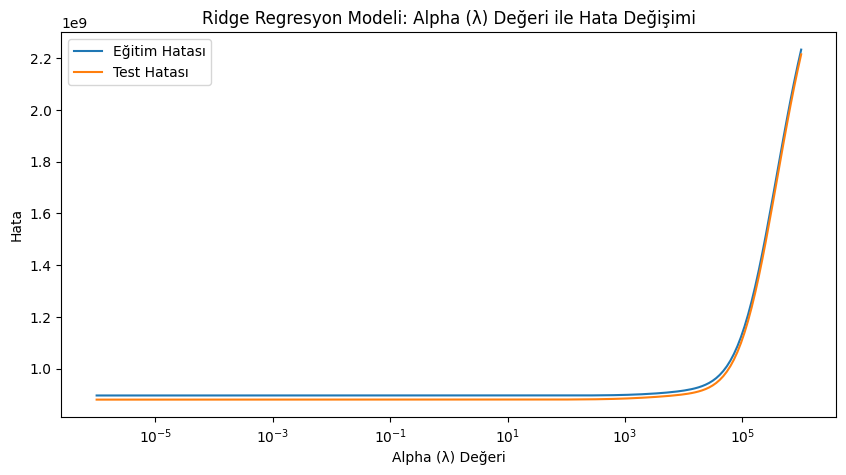

In [79]:
# Defining the Alpha (λ) values.
alphas = np.logspace(-6, 6, 200)  

train_errors = []
test_errors = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(10, 5))
plt.plot(alphas, train_errors, label='Eğitim Hatası')
plt.plot(alphas, test_errors, label='Test Hatası')
plt.xscale('log')
plt.xlabel('Alpha (λ) Değeri')
plt.ylabel('Hata')
plt.title('Ridge Regresyon Modeli: Alpha (λ) Değeri ile Hata Değişimi')
plt.legend()
plt.show()

In this code, Ridge Regression models with different alpha (λ) values ​​are created and the training and testing errors of these models are shown in a graph on a logarithmic scale. We can analyze the overfitting situation by looking at how close the training and testing errors are to each other and at which values ​​of alpha value the error is the smallest. If the training error is significantly lower than the testing error, we can consider overfitting.

NEURAL NETWORK MODEL

In [80]:
from tensorflow.keras import Sequential, layers, callbacks
from sklearn.model_selection import train_test_split

X = df.drop('Salary', axis=1).astype(np.float32)
y = df['Salary'].astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LossHistory(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(f"Epoch {epoch+1}, Loss: {logs.get('loss')}, Validation Loss: {logs.get('val_loss')}")

history = LossHistory()

nn_model = Sequential([
    layers.Input(shape=(X_train.shape[1],)), 
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

nn_model.compile(optimizer="adam", loss='mean_squared_error')

start_time = time.time()

nn_model.fit(X_train.values, y_train.values, epochs=10, validation_data=(X_test.values, y_test.values), callbacks=[history])

training_time = time.time() - start_time





Epoch 1/10

168/168 [==============================] - 1s 2ms/step - loss: 15931033600.0000 - val_loss: 15364847616.0000
Epoch 2/10
168/168 [==============================] - 0s 2ms/step - loss: 13176205312.0000 - val_loss: 9957414912.0000
Epoch 3/10
168/168 [==============================] - 0s 1ms/step - loss: 6327584768.0000 - val_loss: 3361258496.0000
Epoch 4/10
168/168 [==============================] - 0s 1ms/step - loss: 2423286784.0000 - val_loss: 2056048000.0000
Epoch 5/10
168/168 [==============================] - 0s 1ms/step - loss: 1957099136.0000 - val_loss: 1884765696.0000
Epoch 6/10
168/168 [==============================] - 0s 2ms/step - loss: 1798187264.0000 - val_loss: 1732940032.0000
Epoch 7/10
168/168 [==============================] - 0s 1ms/step - loss: 1657464832.0000 - val_loss: 1600750848.0000
Epoch 8/10
168/168 [==============================] - 0s 1ms/step - loss: 1536355328.0000 - val_loss: 1490462848.0000
Epoch 9/10
168/168 [=============================

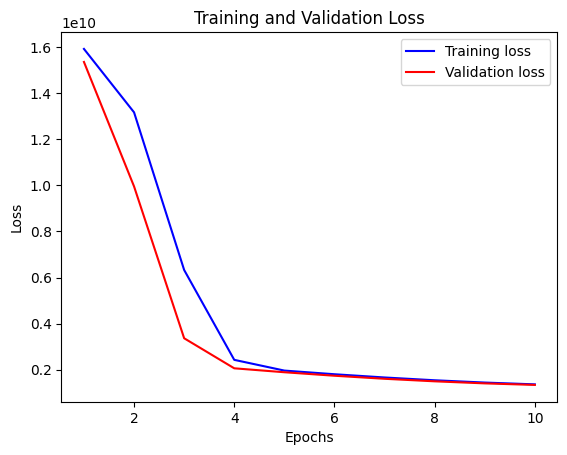

In [81]:
# get the training loss and validation loss values ​​of the model
history_dict = nn_model.history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = nn_model.predict(X_test)

mean_squared_error_nn=mean_squared_error(y_test, y_pred)
r2_score_nn=r2_score(y_test, y_pred)
nn_time=training_time
print('Mean Squared Error:', mean_squared_error_nn)
print('R^2 Score:', r2_score_nn)
print('Time:', nn_time)

42/42 [==============================] - 0s 1ms/step
Mean Squared Error: 879627173.9584522
R^2 Score: 0.6834633968507663
Time: 3.634699583053589


MODELS ANALYSIS

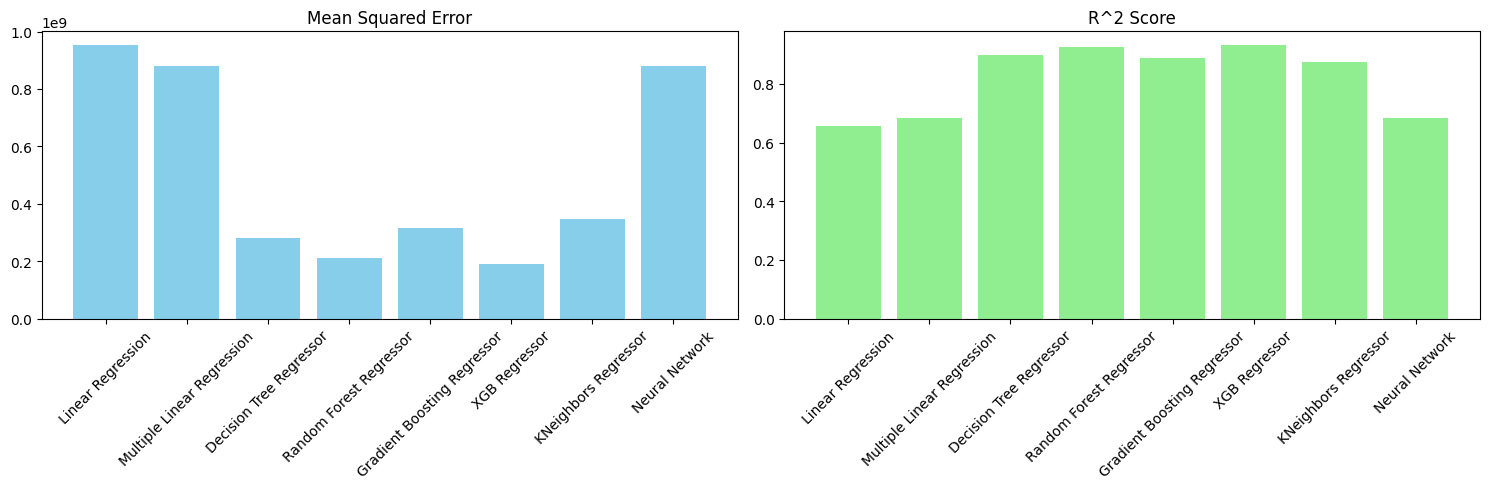

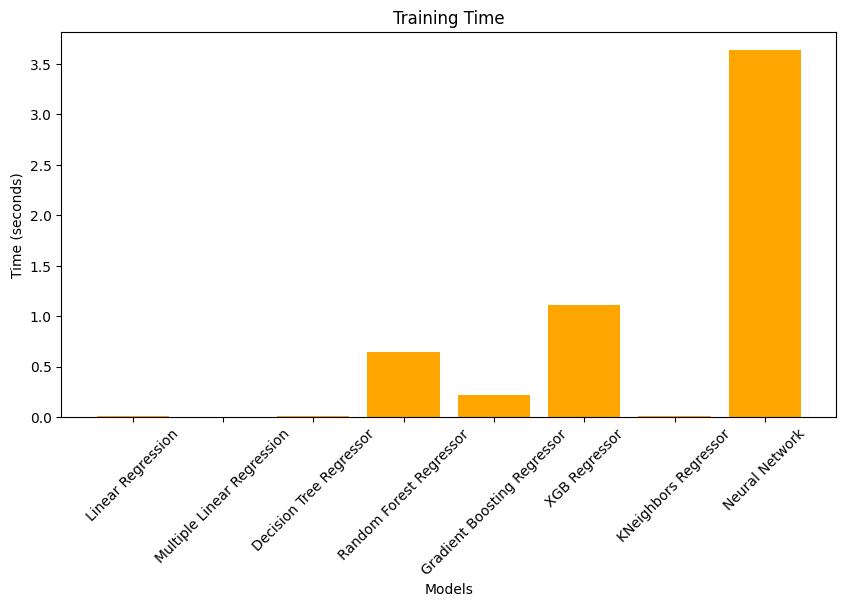

In [83]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Multiple Linear Regression', 'Decision Tree Regressor', 
          'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGB Regressor', 
          'KNeighbors Regressor', 'Neural Network']
mse_values = [mean_squared_error_linear_regression, mean_squared_error_multiple_linear_regression, 
              mean_squared_error_decision_tree_regressor, mean_squared_error_random_forest_regressor, 
              mean_squared_error_gradient_boosting_regressor, mean_squared_error_xgb_regressor, 
              mean_squared_error_kneighbors_regressor, 
              mean_squared_error_nn]
r2_values = [r2_score_linear_regression, r2_score_multiple_linear_regression, 
             r2_score_decision_tree_regressor, r2_score_random_forest_regressor, 
             r2_score_gradient_boosting_regressor, r2_score_xgb_regressor, 
             r2_score_kneighbors_regressor,  r2_score_nn]
time_values = [linear_regression_time, multiple_linear_regression_time, decision_tree_regressor_time, 
               random_forest_regressor_time, gradient_boosting_regressor_time, xgb_regressor_time, 
               kneighbors_regressor_time, nn_time]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R^2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models, time_values, color='orange')
plt.title('Training Time')
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.show()


CHOOSING A MODEL AND MAKING PREDICTION

In [84]:
X

,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,1.0,0.0,18.0,5.0,3.0,9.0
1,0.0,2.0,1.0,3.0,4.0,5.0
2,1.0,3.0,12.0,15.0,1.0,9.0
3,0.0,0.0,16.0,7.0,4.0,5.0
4,1.0,2.0,12.0,20.0,4.0,1.0
...,...,...,...,...,...,...
6679,0.0,3.0,12.0,20.0,3.0,7.0
6680,1.0,1.0,16.0,3.0,0.0,2.0
6681,0.0,0.0,3.0,4.0,2.0,4.0
6682,1.0,2.0,10.0,14.0,2.0,6.0


In [85]:
X=np.array([["Male","Bachelor","Data Analyst",5,"USA","Asian"]])

In [86]:
X[:,0]=label_encoding_gender.transform(X[:,0])
X[:,1]=label_encoding_education_level.transform(X[:,1])
X[:,2]=label_encoding_job_title.transform(X[:,2])
X[:,4]=label_encoding_country.transform(X[:,4])
X[:,5]=label_encoding_race.transform(X[:,5])
X=X.astype(float)
X

array([[1., 0., 1., 5., 4., 1.]])

In [87]:
y_pred=model_xgb_regressor.predict(X)
y_pred

array([144303.19], dtype=float32)

In [88]:
import pickle

In [89]:
data={"model":model_xgb_regressor,"label_encoding_country":label_encoding_country,
      "label_encoding_education_level":label_encoding_education_level,
      "label_encoding_gender":label_encoding_gender,
      "label_encoding_job_title":label_encoding_job_title,
      "label_encoding_race":label_encoding_race}

with open ('saved_model.pkl', 'wb') as file:
    pickle.dump(data,file)

In [90]:
with open ('saved_model.pkl', 'rb') as file:
    data=pickle.load(file)
regressor_loaded=data["model"]
label_encoding_country=data["label_encoding_country"]
label_encoding_education_level=data["label_encoding_education_level"]
label_encoding_gender=data["label_encoding_gender"]
label_encoding_job_title=data["label_encoding_job_title"]
label_encoding_race=data["label_encoding_race"]

In [91]:
y_pred=regressor_loaded.predict(X)
y_pred

array([144303.19], dtype=float32)